# **Forecasting Unit Sales (Task 1)**

#### **Assessment: DS & ML - 1**


#### **submitted by**   ***Harshak Bhagavatula***


bhagvatulaharshak@gmail.com


#### Import necessary libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

#### Mount Drive

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load Data

https://drive.google.com/file/d/1UPcro6Zk2DB3c3Qk9_3TY3c7XpCeK61b/view?usp=drive_link

In [26]:
# Load the data
data = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
data

,ID,TARGET
0,2024-07-01_B09KDR64LT,0
1,2024-07-01_B09KDTS4DC,0
2,2024-07-01_B09KDTHJ6V,0
3,2024-07-01_B09KDQ2BWY,0
4,2024-07-01_B09KDYY3SB,0
...,...,...
2828,2024-07-28_B0BRCW2B64,0
2829,2024-07-28_B0CFV6V981,0
2830,2024-07-28_B0BNL5BKMK,0
2831,2024-07-28_B0CR49BQRS,0


#### Exploratory Data Analysis (EDA)

In [27]:
# Split the 'ID' column into 'date' and 'Item Id'
data[['date', 'Item Id']] = data['ID'].str.split('_', expand=True)
data.drop('ID', axis=1, inplace=True)

# Exploratory Data Analysis (EDA)
## Basic statistics
print(data.describe())

## Check for missing values
print(data.isnull().sum())

       TARGET
count  2833.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
TARGET     0
date       0
Item Id    0
dtype: int64


#### Plotting

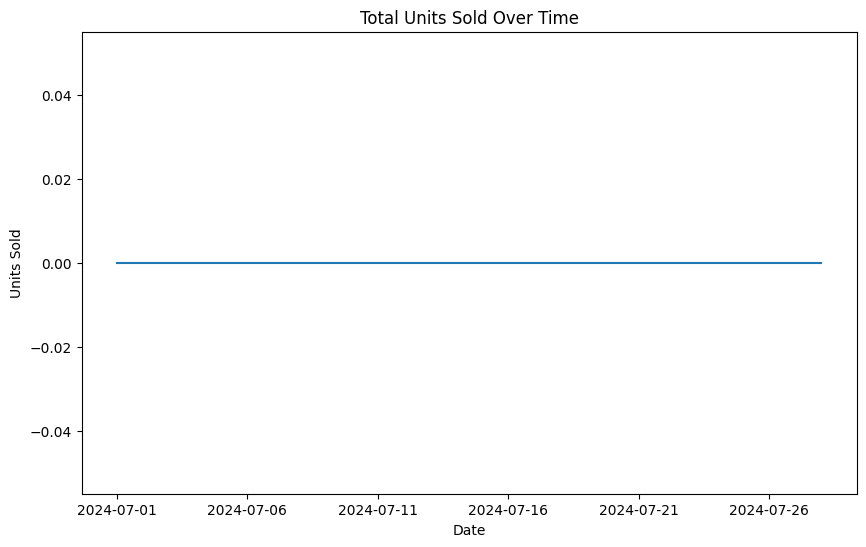

In [28]:

## Plotting
plt.figure(figsize=(10, 6))
data.groupby('date')['TARGET'].sum().plot()
plt.title('Total Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()


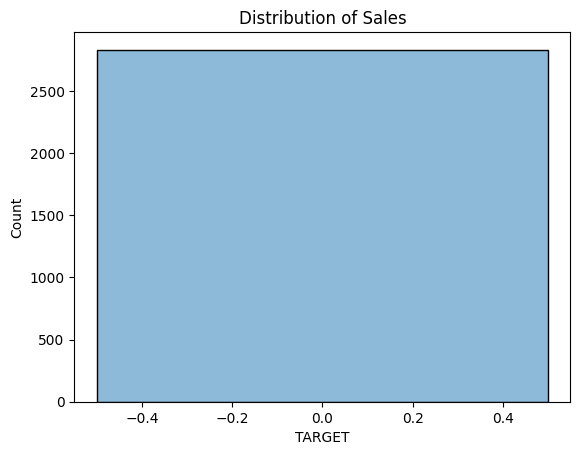

In [29]:
## Distribution of sales
sns.histplot(data['TARGET'], kde=True)
plt.title('Distribution of Sales')
plt.show()

#### Feature Engineering

In [30]:
# Feature Engineering
## Extracting date features
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek

In [31]:

## Label encoding for 'Item Id'
le = LabelEncoder()
data['Item Id'] = le.fit_transform(data['Item Id'])

## Lag features
data['lag_1'] = data.groupby('Item Id')['TARGET'].shift(1)
data['lag_2'] = data.groupby('Item Id')['TARGET'].shift(2)
data['lag_3'] = data.groupby('Item Id')['TARGET'].shift(3)

## Fill NaN values with 0
data.fillna(0, inplace=True)


In [32]:
# Prepare features and target
X = data[['Item Id', 'year', 'month', 'day', 'dayofweek', 'lag_1', 'lag_2', 'lag_3']]
y = data['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Selection

In [33]:
# Model Selection
## Using RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

### Evaluate Model

In [34]:

# Predict and evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0


### Hyperparameter Tuning

In [35]:
# Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
print(f'Best Mean Squared Error: {mse_best}')

Best Mean Squared Error: 0.0


In [37]:
# Prepare the submission file
submission = pd.DataFrame({
    'date': data.loc[X_test.index, 'date'],
    'Item Id': le.inverse_transform(data.loc[X_test.index, 'Item Id']),
    'TARGET': y_pred_best
})
submission.to_csv('submission.csv', index=False)
print('Submission file created successfully!')

Submission file created successfully!


In [38]:
# Display the contents of the submission file
submission_file = 'submission.csv'
# Read and display the first few rows of the submission file
submission_df = pd.read_csv(submission_file)
print(submission_df.head())

         date     Item Id  TARGET
0  2024-07-26  B0CR4C5WXS     0.0
1  2024-07-25  B09KTJRHC7     0.0
2  2024-07-11  B09MR4B13C     0.0
3  2024-07-11  B09KTMKDKJ     0.0
4  2024-07-02  B0BRCW2B64     0.0


In [39]:
import os

# Print the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content


In [43]:
submission_df = pd.read_csv(submission_file)
submission_df.head()

,date,Item Id,TARGET
0,2024-07-26,B0CR4C5WXS,0.0
1,2024-07-25,B09KTJRHC7,0.0
2,2024-07-11,B09MR4B13C,0.0
3,2024-07-11,B09KTMKDKJ,0.0
4,2024-07-02,B0BRCW2B64,0.0


In [44]:
# Path to save the submission file in Google Drive
submission_file_path = '/content/drive/MyDrive/predictedresults.csv'

# Save the DataFrame to a CSV file
submission_df.to_csv(submission_file_path, index=False)
print('Submission file saved successfully to Google Drive!')

# Verify by reading the file back and displaying the first few rows
saved_submission_df = pd.read_csv(submission_file_path)
print(saved_submission_df.head())


Submission file saved successfully to Google Drive!
         date     Item Id  TARGET
0  2024-07-26  B0CR4C5WXS     0.0
1  2024-07-25  B09KTJRHC7     0.0
2  2024-07-11  B09MR4B13C     0.0
3  2024-07-11  B09KTMKDKJ     0.0
4  2024-07-02  B0BRCW2B64     0.0
